<a href="https://colab.research.google.com/github/tunjis/Moving-Average-Crossover-Signals/blob/main/Moving_Average_Crossover_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


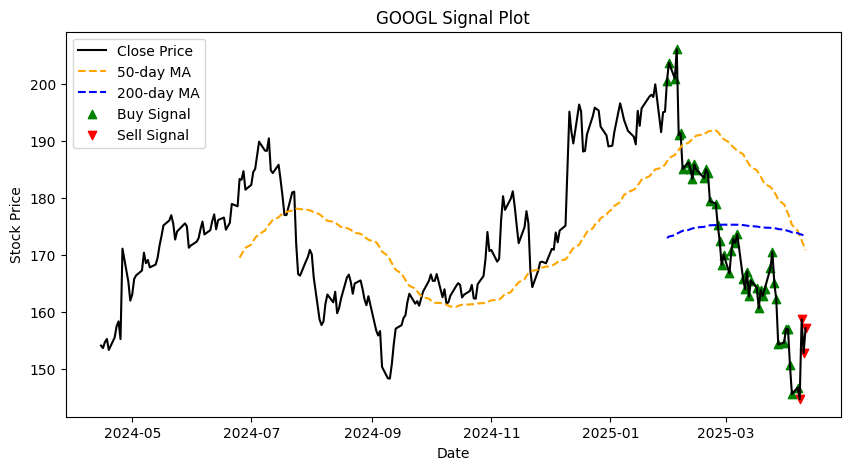

[*********************100%***********************]  1 of 1 completed


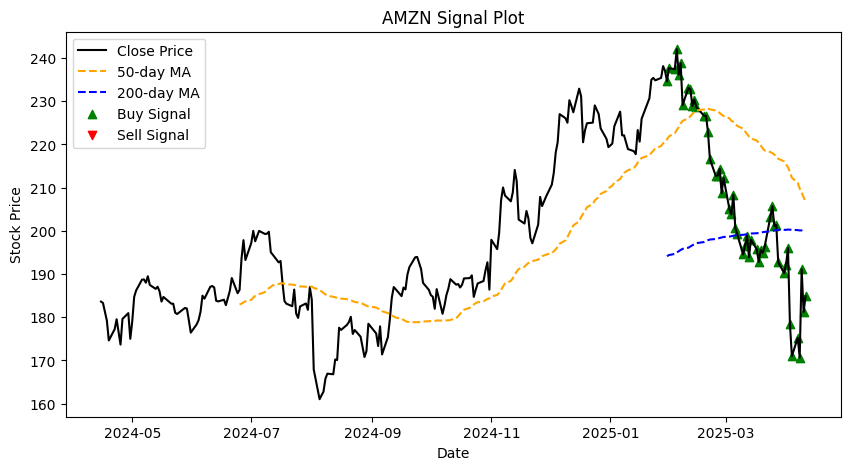

[*********************100%***********************]  1 of 1 completed


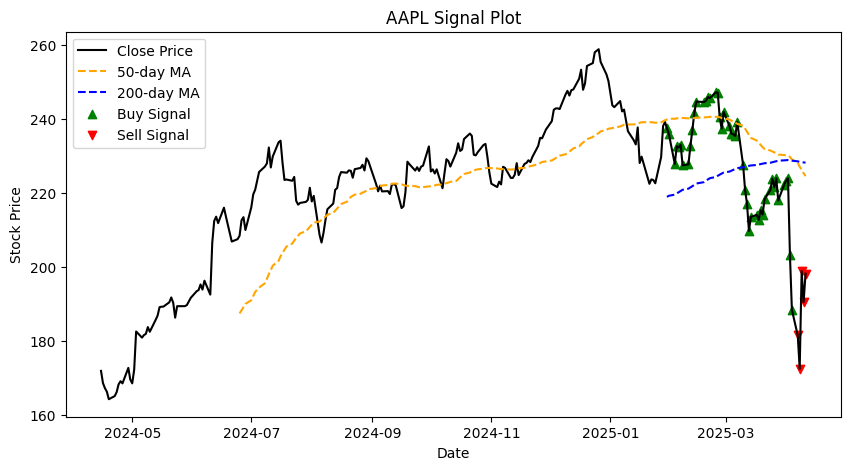

[*********************100%***********************]  1 of 1 completed


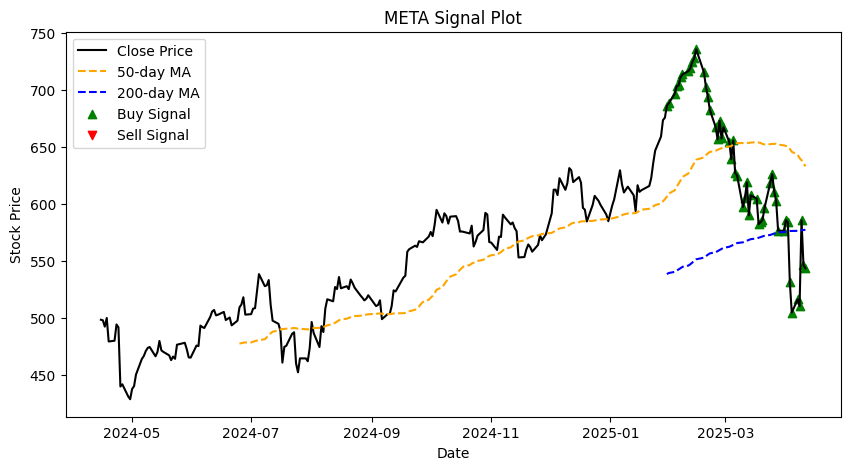

[*********************100%***********************]  1 of 1 completed


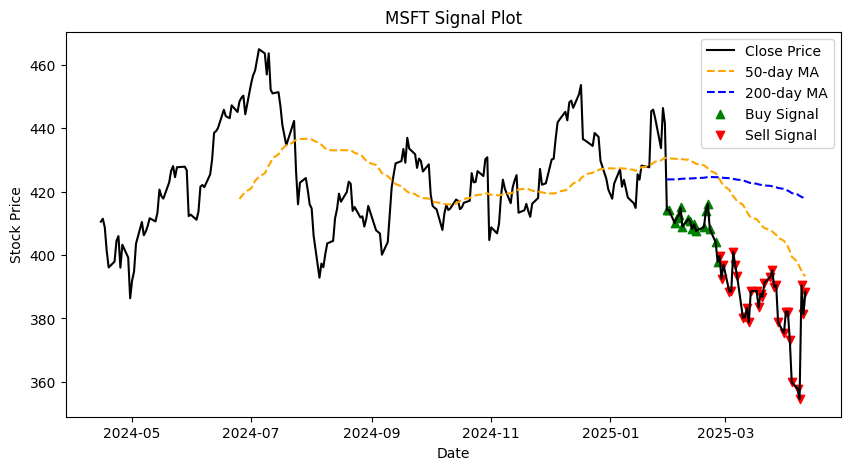

[*********************100%***********************]  1 of 1 completed


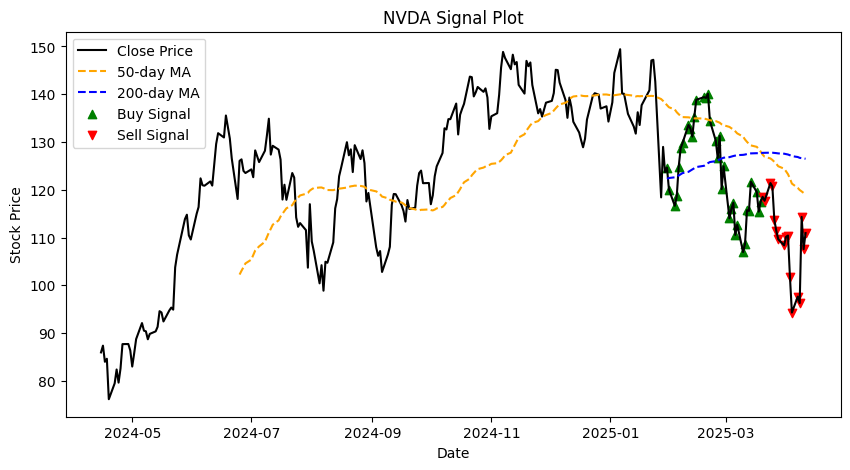

[*********************100%***********************]  1 of 1 completed


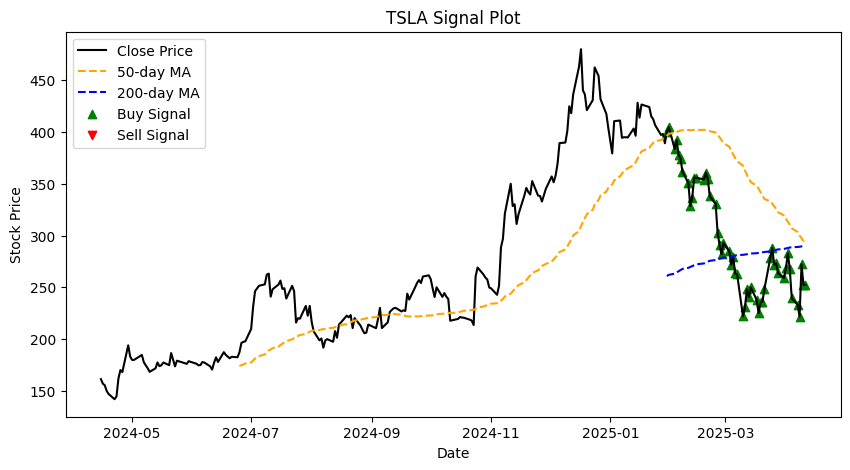

In [3]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

# List of stocks to check (MAG7 in this case)
stocks_to_check = ['GOOGL', 'AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'TSLA']

# Calculate dynamic date range (past 1 year up to last trading day)
start_date = (datetime.today() - timedelta(days=365)).strftime('%Y-%m-%d')
end_date = datetime.today().strftime('%Y-%m-%d')

# Function to get historical stock data from Yahoo Finance
def get_stock_data(stock_symbol):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

# Function to implement moving average strategy
def moving_average_strategy(stock_data):
    stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()
    stock_data['Buy_Signal'] = stock_data['MA_50'] > stock_data['MA_200']
    stock_data['Sell_Signal'] = stock_data['MA_50'] < stock_data['MA_200']

    # Create a new column for signals: Buy, Sell, or Hold
    stock_data['Signal'] = 'Hold'
    stock_data.loc[stock_data['Buy_Signal'], 'Signal'] = 'Buy'
    stock_data.loc[stock_data['Sell_Signal'], 'Signal'] = 'Sell'

    return stock_data[['Close', 'MA_50', 'MA_200', 'Signal']]

# Iterate through stocks and implement strategy
for stock_symbol in stocks_to_check:
    try:
        # Get historical stock data
        stock_data = get_stock_data(stock_symbol)

        # Implement moving average strategy
        strategy_results = moving_average_strategy(stock_data)

        # Plot closing price and moving averages
        plt.figure(figsize=(10, 5))
        plt.plot(strategy_results['Close'], label='Close Price', color='black')
        plt.plot(strategy_results['MA_50'], label='50-day MA', linestyle='--', color='orange')
        plt.plot(strategy_results['MA_200'], label='200-day MA', linestyle='--', color='blue')

        # Highlight Buy signals with green dots
        plt.scatter(strategy_results.index[strategy_results['Signal'] == 'Buy'], strategy_results['Close'][strategy_results['Signal'] == 'Buy'], marker='^', color='g', label='Buy Signal')

        # Highlight Sell signals with red dots
        plt.scatter(strategy_results.index[strategy_results['Signal'] == 'Sell'], strategy_results['Close'][strategy_results['Signal'] == 'Sell'], marker='v', color='r', label='Sell Signal')

        plt.title(f'{stock_symbol} Signal Plot')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"\nError processing {stock_symbol}: {e}")